In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from pandas_datareader import data
import numpy as np
from dateutil import parser
from pandas_datareader import data as pdr

Fetch Data from Yahoo Finance

In [2]:
start_date = '1990-01-01'
end_date = '2022-12-01'

sp500_data = data.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2022-11-23,4000.300049,4033.780029,3998.659912,4027.260010,4027.260010,3279720000
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000


In [51]:
# sp500_weekly = sp500_data["Adj Close"].resample('W').ohlc().drop(['open', 'high', 'low'], axis=1)
# sp500_weekly.rename(columns = {"close": "Adj Close"}, inplace=True)
# sp500_weekly['return'] = sp500_weekly['Adj Close'].pct_change()


## Calculate Monthly Realised Volatility

In [4]:
window = 21  # trading days in rolling window
days_per_year = 252    # trading days per year
ann_factor = days_per_year / window
df = sp500_data
df['log_return'] = np.log(df['Adj Close']).diff()

# Var Swap (returns are not demeaned)
df['real_var'] = np.square(df['log_return']).rolling(window).sum() * ann_factor
df['real_vol'] = np.sqrt(df['real_var'])

# Classical (returns are demeaned, dof=1)
df['real_var'] = df['log_return'].rolling(window).var() * ann_factor
df['real_vol'] = np.sqrt(df['real_var'])

df

,Open,High,Low,Close,Adj Close,Volume,log_return,real_var,real_vol
Date,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,-0.002589,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,-0.008650,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,-0.009804,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,0.004504,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-11-23,4000.300049,4033.780029,3998.659912,4027.260010,4027.260010,3279720000,0.005897,0.003393,0.058250
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000,-0.000283,0.003341,0.057804
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000,-0.015565,0.003489,0.059065


## Distribution of S&P Log returns

<AxesSubplot: title={'center': 'S&P Log Returns'}, xlabel='Date'>

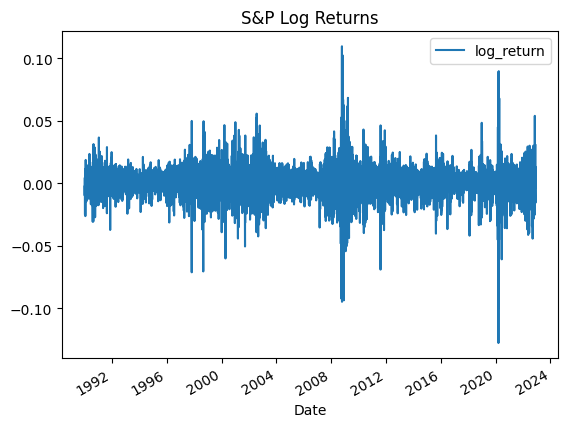

In [5]:
df.plot(y='log_return', title="S&P Log Returns")

<AxesSubplot: title={'center': 'Realised S&P volatility'}, xlabel='Date'>

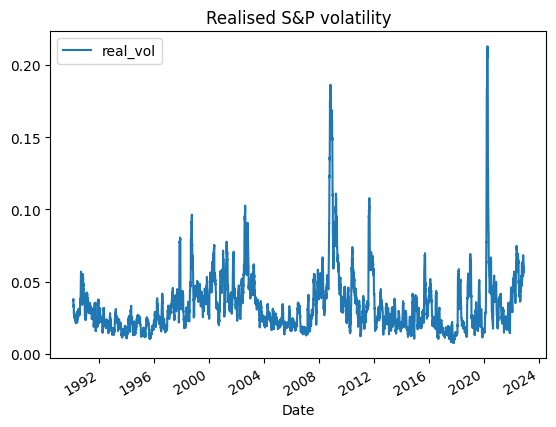

In [6]:
df.plot(y='real_vol', title="Realised S&P volatility")

<AxesSubplot: ylabel='Frequency'>

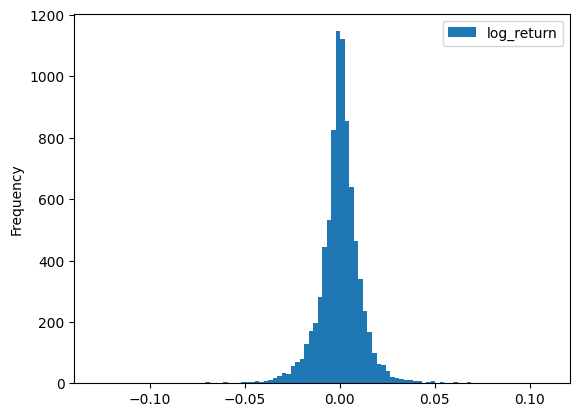

In [7]:
df.plot(y='log_return', kind='hist', bins=100)

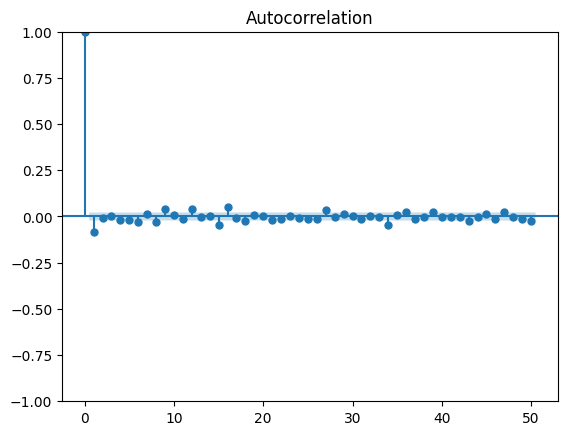

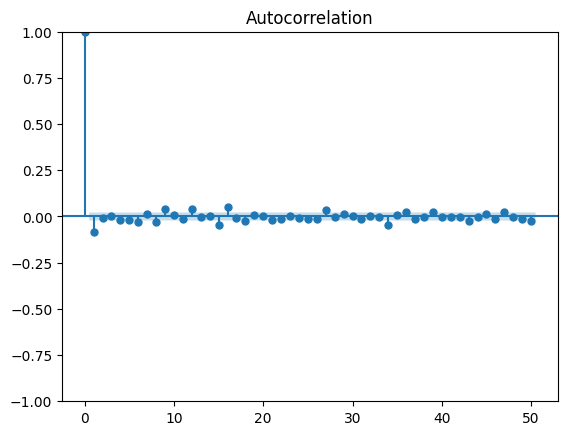

In [8]:
plot_acf(x=df["log_return"].dropna().values.squeeze(), lags=50)

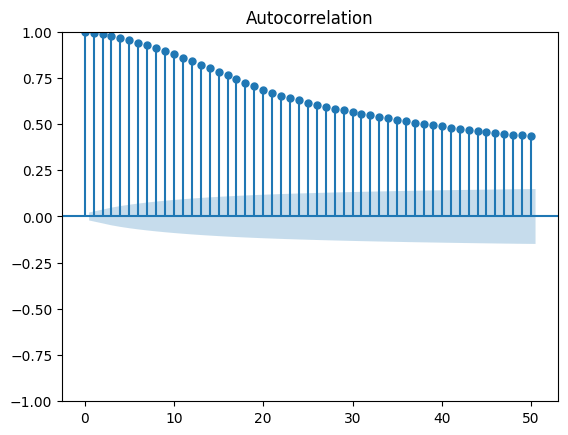

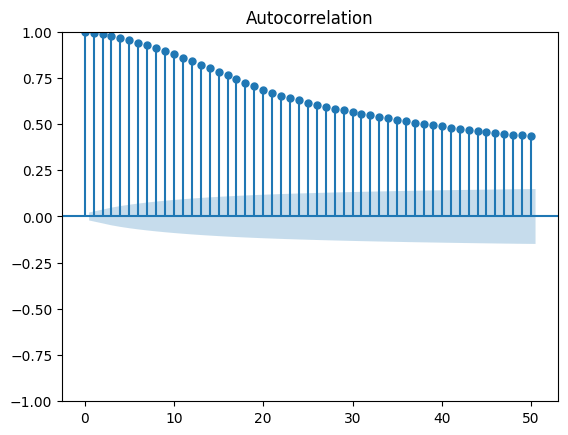

In [9]:
plot_acf(x=df["real_vol"].dropna().values.squeeze(), lags=50)


2022-12-20 00:00:00


<AxesSubplot: xlabel='DATE'>

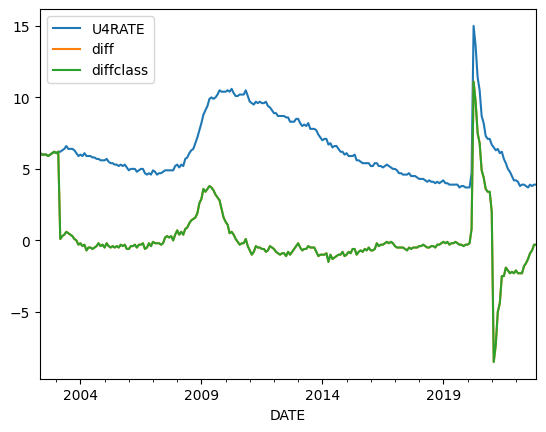

In [48]:
start = parser.parse("2002-05-01")
end =  parser.parse("2022-12-20")
print(end)

fred = pdr.DataReader('U4RATE', 'fred', start, end)

# U4RATE,  Total Unemployed Plus Discouraged Workers, as a Percent of the Civilian Labor Force Plus Discouraged Workers

import numpy as np

diff_kernel = np.array([1,0,0,0,0,0,0,0,0,0,-1])
diff = np.convolve(fred["U4RATE"], diff_kernel)

#ignore the extra indexes from the convolution 
diff = diff[0 :np.size(diff)-np.size(diff_kernel)+1] 


fred["diff"] = diff
fred["diffclass"] = diff

fred.plot()


<AxesSubplot: xlabel='DATE'>

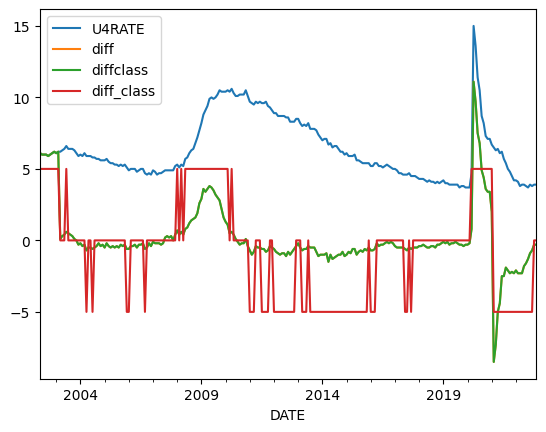

In [49]:
def u4class(x):
    if x < -0.5:
        return -1
    elif x > 0.5: 
        return 1
    else:
        return 0

fred["diff_class"] = np.vectorize(u4class)(diff)*5

fred.plot()

5704
5454


<AxesSubplot: xlabel='DATE'>

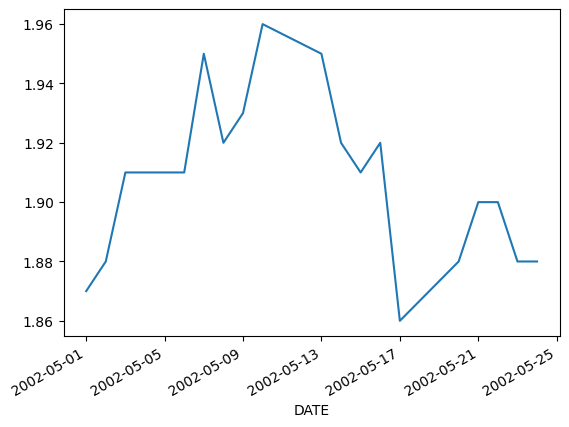

In [79]:
data = pdr.DataReader(['T10Y2Y', 'U4RATE'], 'fred', start, end)
data['U4RATE'].ffill(inplace=True)
diff_yoy_kernel = np.zeros(251)
diff_yoy_kernel[0] = 1
diff_yoy_kernel[-1] = -1
diff = np.convolve(data["T10Y2Y"], diff_yoy_kernel, "same")
print(len(diff))
data['BondTrend'] = diff
data['BondTrend'].plot()